Гаврилина Александра, группа БПМ152 (возможно, я нахожусь в списке 154 группы, т.к. переводилась, но сейчас я в 152)

Вариант 7

$\Large \textbf{2.3.2: метод простой итерации}$

Локализовать корни уравнения $f(x)=0$ и найти их с точностью $\varepsilon=10^{-5}$, используя метод простой итерации. К виду $x=\varphi(x)$, удобному для итераций, уравнение $f(x)=0$ привести двумя способами.

a) Преобразовать уравнение в виду $x=x-\alpha f(x)$, где $\alpha=\cfrac{2}{M+m}, 0 < m \leqslant f^\prime (x) \leqslant M$, а $x$ принадлежит отрезку локализации $[a, b]$.

b) Любым другим преобразованием уравнения. Проверить достаточное условие сходимости метода. 


Использовать критерий окончания итерационного процесса вида $\vert x^{(n)} - x^{(n-1)} \vert < \cfrac{1-q}{q} \varepsilon$, где

в п. a) $q = \cfrac{M-m}{M+m}$,

в п. b) $q = \max\limits_{x \in [a, b]} \vert \varphi^\prime (x) \vert$.

Сравнить число итераций и значения величины $q$ в п. a), п. b).

$\Large \textbf{Метод простой итерации: теория}$

Метод простой итерации — один из простейших численных методов решения уравнений. Метод основан на принципе сжимающего отображения, который применительно к численным методам в общем виде также может называться методом последовательных приближений.

Чтобы применить метод простой итерации для решения нелинейного уравнения $f(x)=0$, необходимо преобразовать это уравнение к следующему виду:

$$x = \varphi(x).$$

Это преобразование (приведение к виду, удобному для итераций) можно выполнить разными способами. Функция $\varphi$ называется итерационной функцией.

Выберем каким-либо образом приближенное значение корня $x^{(0)}$ и подставим его в правую часть уравнения $x = \varphi(x).$ Получим значение $x^{(1)} = \varphi(x^{(0)})$. Подставляя теперь $x^{(1)}$ в правую часть уравнения $x = \varphi(x)$, имеем $x^{(2)} = \varphi(x^{(1)})$. Продолжая этот процесс неограниченно, получаем последовательность приближений к корню, вычисляемых по формуле

$$x^{(n+1)} = \varphi(x^{(n)}), \quad n \geqslant 0.$$

Если существует предел построенной последовательности $\bar{x} = \lim\limits_{n \to \infty} x^{(n)}$, то, переходя к пределу в равенстве $x^{(n+1)} = \varphi(x^{(n)})$ и предполагая функцию $\varphi$ непрерывной, получаем равенство

$$\bar{x} = \varphi(\bar{x}).$$

Это значит, что $\bar{x}$ - корень уравнения $x = \varphi(x)$.

$\textbf{Критерий окончания}$

$$\vert x^{(n)} - x^{(n-1)} \vert < \cfrac{1-q}{q} \varepsilon.$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize
from numpy.linalg import norm
from decimal import Decimal
%matplotlib inline

In [6]:
f = lambda x: math.exp(-x) - math.log10(1-x**2) - 2
f1 = lambda x: -math.exp(-x) + (2*x)/((1-x**2)*math.log(10))

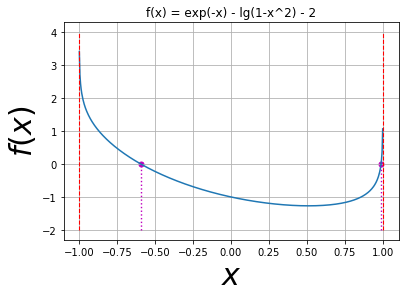

In [8]:
x, s = np.linspace(-0.999, 0.999, 500, retstep=True)
fx = np.exp(-x) - np.log10(1-x**2) - 2
fdx = -np.exp(-x) + (2*x)/((1-x**2)*np.log(10))
plt.plot(x, fx)
plt.plot([-1, -1, -1, -1, -1, -1, -1], [-2, -1, 0, 1, 2, 3, 4], c='r', linestyle='--', linewidth = 1.1)
plt.plot([1, 1, 1, 1, 1, 1, 1], [-2, -1, 0, 1, 2, 3, 4], c='r', linestyle='--', linewidth = 1.1) # асимптоты для красоты
plt.plot([-0.5939, -0.5939], [-2, 0], c='m', linestyle=':', linewidth = 1.4)
plt.plot([0.9881, 0.9881], [-2, 0], c='m', linestyle=':', linewidth = 1.4) # линии от корней
plt.grid(True)
plt.xlabel(r'$x$', fontsize=30)
plt.ylabel(r'$f(x)$', fontsize=30)
plt.title('f(x) = exp(-x) - lg(1-x^2) - 2')
plt.scatter(0.9881, 0, c='m', s = 25)
plt.scatter(-0.5939, 0, c='m', s = 25)
#plt.scatter(x1, 0, c='r')

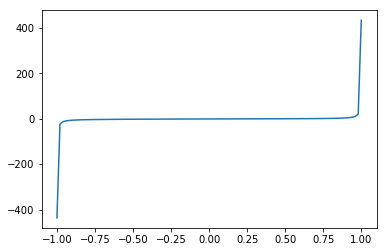

In [4]:
x, s = np.linspace(-0.999, 0.999, 100, retstep=True)
fdx = -np.exp(-x) + (2*x)/((1-x**2)*np.log(10))
plt.plot(x, fdx)

In [24]:
a = -0.75
b = -0.25
x0 =(a+b)/2
L = 1/f1(x0)
L

-0.44887724088288977

In [25]:
def FixedPoint(f, x0, tol, maxiter):
    e = 1
    itr = 0
    xp = 0
    # xp = []
    while(e > tol and itr < maxiter):
        x = f(x0)      # fixed point equation
        e = norm(x0-x) # error at the current step
        x0 = x
        xp = x0 #.append(x0)  # save the solution of the current step
        itr = itr + 1
    return x, xp

In [26]:
x1 = FixedPoint(f, x0, 10e-5, 100)
x1

ValueError: math domain error

In [27]:
y1 = scipy.optimize.fixed_point(f, 0.75)
y1

ValueError: math domain error